<h1><b>Data Analysis of Natural Gas Consumption</b><h1>

<h5>
Done By : Tang Jia Yi </br>
Admin No. : 2214465 </br>
Class : DAAA/1B/04 </br>
<h5>

<hr>
<h3><b>Scenario:</b></h3>
Ronnie is a Republic Polytechnic student taking the Diploma in Environmental and Marine Science (DEMS). He is currently doing his internship at the National Environment Agency (NEA) and is assigned to work on a project to analyse the natural gas consumption in Singapore. He is required to analyse the data and provide a report to the NEA. 
</br>
</br>
<hr>


<h1>Initialising datasets and libraries</h1>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Energy consumption dataset
energyConsumption = './Data/total-final-energy-consumption-2009-to-2019.csv'
energyConsumptionDF = pd.read_csv(energyConsumption)

# Natural gas consumption dataset 
gasConsumption = './Data/natural-gas-consumption-by-sub-sector-2009-to-2020.csv'
gasConsumptionDF = pd.read_csv(gasConsumption)

# CO2 emissions dataset
emissions = './Data/annual-co2-emissions-per-country.csv'
emissionsDF = pd.read_csv(emissions)

# CO2 emissions from gas dataset
gasEmissions = './Data/annual-co2-gas.csv'
gasEmissionsDF = pd.read_csv(gasEmissions)

<h1>Functions</h1>

In [3]:
# Check for missing values in data
def checkMissingValues(df):
    print("Missing Values in Data:")
    print(df.isnull().sum())
    print('\n')
    
    if (df.isnull().sum().sum() == 0):
        print("No Missing Values in data")
        
# Reformat title to produce a subtitle
def format_title(title, subtitle=None,title_font_size = 22, subtitle_font_size=14):
    title = f'<b style="font_size:{title_font_size}px;">{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

<h1>Information on the datasets</h1>

<h3>Dataset 1</h3>

In [4]:
energyConsumptionDF.info()
energyConsumptionDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              330 non-null    int64  
 1   sector            330 non-null    object 
 2   energy_products   330 non-null    object 
 3   consumption_ktoe  330 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.4+ KB


year                         sector     energy_products  consumption_ktoe
0    2009  Commerce and Services-related       Coal and Peat               0.0
1    2009  Commerce and Services-related           Crude Oil               0.0
2    2009  Commerce and Services-related         Electricity            1272.6
3    2009  Commerce and Services-related         Natural Gas              72.9
4    2009  Commerce and Services-related              Others               0.0
..    ...                            ...                 ...               ...
325  2019              Transport-related           Crude Oil               0.0
326  2019              Transport-related         Electricity             259.8
327  2019              Transport-related         Natural Gas               2.7
328  2019              Transport-related              Others               0.0
329  2019              Transport-related  Petroleum Products            2320.1

[330 rows x 4 columns]

<h3>Dataset 2</h3>

In [5]:
gasConsumptionDF.info()
gasConsumptionDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               168 non-null    int64  
 1   sector             168 non-null    object 
 2   sub_sector         168 non-null    object 
 3   ng_consumption_tj  168 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


year                        sector  \
0    2009            Industrial-related   
1    2009            Industrial-related   
2    2009            Industrial-related   
3    2009            Industrial-related   
4    2009  Commerce and Service-related   
..    ...                           ...   
163  2020  Commerce and Service-related   
164  2020  Commerce and Service-related   
165  2020     Transport-related (49-53)   
166  2020                    Households   
167  2020                   Others (00)   

                                            sub_sector  ng_consumption_tj  
0                                        Manufacturing            29960.9  
1                                         Construction              132.2  
2                                            Utilities              320.3  
3                             Other Industrial-related                0.0  
4                           Wholesale and Retail Trade              116.7  
..                                                 ...                ...  
163  Professional, Scientific & Technical, Administ...              137.5  
164                 Other Commerce and Service-related              544.0  
165                                  Transport-related               82.3  
166                                         Households             3191.0  
167                                             Others              127.0  

[168 rows x 4 columns]

<h3>Dataset 3</h3>

In [6]:
emissionsDF.info()
emissionsDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                31349 non-null  object 
 1   Code                  24974 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31348 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB


Entity Code  Year  Annual CO₂ emissions
0      Afghanistan  AFG  1949               14656.0
1      Afghanistan  AFG  1950               84272.0
2      Afghanistan  AFG  1951               91600.0
3      Afghanistan  AFG  1952               91600.0
4      Afghanistan  AFG  1953              106256.0
...            ...  ...   ...                   ...
31344     Zimbabwe  ZWE  2017             9596071.0
31345     Zimbabwe  ZWE  2018            11795478.0
31346     Zimbabwe  ZWE  2019            11114607.0
31347     Zimbabwe  ZWE  2020            10607897.0
31348     Zimbabwe  ZWE  2021            11296114.0

[31349 rows x 4 columns]

<h3>Dataset 4</h3>

In [7]:
gasEmissionsDF.info()
gasEmissionsDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24943 entries, 0 to 24942
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         24943 non-null  object 
 1   Code                           21517 non-null  object 
 2   Year                           24943 non-null  int64  
 3   Annual CO₂ emissions from gas  24943 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 779.6+ KB


Entity Code  Year  Annual CO₂ emissions from gas
0      Afghanistan  AFG  1949                            0.0
1      Afghanistan  AFG  1950                            0.0
2      Afghanistan  AFG  1951                            0.0
3      Afghanistan  AFG  1952                            0.0
4      Afghanistan  AFG  1953                            0.0
...            ...  ...   ...                            ...
24938     Zimbabwe  ZWE  2017                            0.0
24939     Zimbabwe  ZWE  2018                            0.0
24940     Zimbabwe  ZWE  2019                            0.0
24941     Zimbabwe  ZWE  2020                            0.0
24942     Zimbabwe  ZWE  2021                            0.0

[24943 rows x 4 columns]

<h1>Data Cleaning and Wrangling</h1>

<h2>Datasets 1 and 2</h2>

Datasets 1 and 2 have sector names that are inconsistent, so we rename them so that they are consistent.</br>

In [8]:
# Checking to see what sector names are in dataset 1
energyConsumptionDF["sector"].value_counts()

Commerce and Services-related    66
Households                       66
Industry-related                 66
Others                           66
Transport-related                66
Name: sector, dtype: int64

In [9]:
# Checking to see what sector names are in dataset 2
gasConsumptionDF["sector"].value_counts()

Commerce and Service-related    84
Industrial-related              48
Transport-related (49-53)       12
Households                      12
Others (00)                     12
Name: sector, dtype: int64

In [10]:
# Renaming sector names to match

gasConsumptionDF["sector"] = gasConsumptionDF["sector"].replace(
    "Commerce and Service-related", "Commerce and Services-related"
)
gasConsumptionDF["sector"] = gasConsumptionDF["sector"].replace(
    "Industrial-related", "Industry-related"
)
gasConsumptionDF["sector"] = gasConsumptionDF["sector"].replace(
    "Others (00)", "Others"
)
gasConsumptionDF["sector"] = gasConsumptionDF["sector"].replace(
    "Transport-related (49-53)", "Transport-related"
)

In [11]:
# Verify the changes
gasConsumptionDF["sector"].value_counts()

Commerce and Services-related    84
Industry-related                 48
Transport-related                12
Households                       12
Others                           12
Name: sector, dtype: int64

<h3>Dataset 1</h3>

We only want to keep the natural gas consumption data of dataset 1, so we remove the others.</br>

In [12]:
# Removing energy products that are not natural gas
energyConsumptionDF = energyConsumptionDF.loc[energyConsumptionDF['energy_products'] == 'Natural Gas']

# Verify changes
energyConsumptionDF.head()

year                         sector energy_products  consumption_ktoe
3   2009  Commerce and Services-related     Natural Gas              72.9
9   2009                     Households     Natural Gas              54.0
15  2009               Industry-related     Natural Gas             726.4
21  2009                         Others     Natural Gas               0.8
27  2009              Transport-related     Natural Gas              13.7

<h3>Dataset 2</h3>

The unit of measurement for consumption in dataset 2 is in TJ, so we convert it to ktoe.</br>

We use the conversion 1 TJ = 23.88458966275 toe.

In [13]:
# Create new column for natural gas consumption in ktoe
gasConsumptionDF['ng_consumption_ktoe'] = (
    gasConsumptionDF['ng_consumption_tj'] * 23.88458966275 / 1000
)

# Drop consumption in TJ column
gasConsumptionDF = gasConsumptionDF.drop(columns=['ng_consumption_tj'])

# Verify changes
gasConsumptionDF.head()

year                         sector                  sub_sector  \
0  2009               Industry-related               Manufacturing   
1  2009               Industry-related                Construction   
2  2009               Industry-related                   Utilities   
3  2009               Industry-related    Other Industrial-related   
4  2009  Commerce and Services-related  Wholesale and Retail Trade   

   ng_consumption_ktoe  
0           715.603802  
1             3.157543  
2             7.650234  
3             0.000000  
4             2.787332

Now we are able to merge the two datasets into gasConsumptionDF.</br>

In [14]:
# Merge the two datasets
gasConsumptionDF = gasConsumptionDF.merge(energyConsumptionDF, how='inner', on=['year', 'sector'])

# Remove the energy_products column as it is the same for all rows
gasConsumptionDF = gasConsumptionDF.drop(columns=['energy_products'])

# Verify changes
gasConsumptionDF.head()

year                         sector                  sub_sector  \
0  2009               Industry-related               Manufacturing   
1  2009               Industry-related                Construction   
2  2009               Industry-related                   Utilities   
3  2009               Industry-related    Other Industrial-related   
4  2009  Commerce and Services-related  Wholesale and Retail Trade   

   ng_consumption_ktoe  consumption_ktoe  
0           715.603802             726.4  
1             3.157543             726.4  
2             7.650234             726.4  
3             0.000000             726.4  
4             2.787332              72.9

In [15]:
checkMissingValues(gasConsumptionDF)

Missing Values in Data:
year                   0
sector                 0
sub_sector             0
ng_consumption_ktoe    0
consumption_ktoe       0
dtype: int64


No Missing Values in data


<h2>Datasets 3 and 4</h2>

Datasets 3 and 4 contain data on countries other than Singapore, so we remove all rows that are not Singapore.</br>

The datasets also contain years that are not in the range 2009-2019, so we remove those rows as well.</br>

Names of the columns are also changed to make it easier to merge the datasets.</br>

<h3>Dataset 3</h3>

In [16]:
# Remove emission data of countries other than Singapore
emissionsDF = emissionsDF.loc[emissionsDF["Entity"] == "Singapore"]

# Remove emission data of years outisde of 2009-2019 range
emissionsDF = emissionsDF.loc[(emissionsDF['Year'] >= 2009) & (emissionsDF['Year'] <= 2019)]

# Renaming columns 
emissionsDF.rename(
    columns={
        "Year": "year",
        "Entity": "entity",
        "Code": "code",
        "Annual CO₂ emissions": "annual_co2_emissions"
    },
    inplace=True
)

# Verify the changes 
emissionsDF.head()

entity code  year  annual_co2_emissions
25515  Singapore  SGP  2009            43128944.0
25516  Singapore  SGP  2010            55066256.0
25517  Singapore  SGP  2011            31206288.0
25518  Singapore  SGP  2012            48328160.0
25519  Singapore  SGP  2013                   NaN

In [17]:
checkMissingValues(emissionsDF)

Missing Values in Data:
entity                  0
code                    0
year                    0
annual_co2_emissions    1
dtype: int64




There is a missing value in the annual_co2_emissions column. To fill the value, we will use linear regression to predict the value.</br>

In [18]:
# Create training data by dropping null values
train = emissionsDF.dropna()

In [19]:
# Model
model = sm.OLS(train['annual_co2_emissions'], train['year']).fit()
predictions = model.predict(emissionsDF['year'])

# Verify model
model.summary()

c:\Users\tangj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     annual_co2_emissions   R-squared (uncentered):                   0.957
Model:                              OLS   Adj. R-squared (uncentered):              0.952
Method:                   Least Squares   F-statistic:                              200.5
Date:                  Sat, 04 Feb 2023   Prob (F-statistic):                    1.86e-07
Time:                          01:45:16   Log-Likelihood:                         -174.56
No. Observations:                    10   AIC:                                      351.1
Df Residuals:                         9   BIC:                                      351.4
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year         2.16e+04   1525.797     14.160      0.000    1.82e+04    2.51e+04
==============================================================================
Omnibus:                        1.943   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                0.820
Skew:                          -0.082   Prob(JB):                        0.664
Kurtosis:                       1.607   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Find which year we need to predict
missingPredict = emissionsDF[emissionsDF['annual_co2_emissions'].isnull()]
missingPredict

entity code  year  annual_co2_emissions
25519  Singapore  SGP  2013                   NaN

In [21]:
# Use the model to predict the missing value for 2013
emissionsDF.loc[emissionsDF['year'] == 2013, 'annual_co2_emissions'] = model.predict(2013)

# Verify the changes
emissionsDF

entity code  year  annual_co2_emissions
25515  Singapore  SGP  2009          4.312894e+07
25516  Singapore  SGP  2010          5.506626e+07
25517  Singapore  SGP  2011          3.120629e+07
25518  Singapore  SGP  2012          4.832816e+07
25519  Singapore  SGP  2013          4.349084e+07
25520  Singapore  SGP  2014          5.225230e+07
25521  Singapore  SGP  2015          5.646590e+07
25522  Singapore  SGP  2016          3.565438e+07
25523  Singapore  SGP  2017          3.715662e+07
25524  Singapore  SGP  2018          4.601984e+07
25525  Singapore  SGP  2019          2.991656e+07

<h3>Dataset 4</h3>

In [22]:
# Remove emission data of countries other than Singapore
gasEmissionsDF = gasEmissionsDF.loc[gasEmissionsDF["Entity"] == "Singapore"]

# Remove emission data of years outisde of 2009-2019 range
gasEmissionsDF = gasEmissionsDF.loc[(gasEmissionsDF['Year'] >= 2009) & (gasEmissionsDF['Year'] <= 2019)]

# Renaming columns 
gasEmissionsDF.rename(
    columns={
        "Year": "year",
        "Entity": "entity",
        "Code": "code",
        "Annual CO₂ emissions from gas": "annual_co2_emissions_from_gas"
    },
    inplace=True
)

# Verify the changes 
gasEmissionsDF.head()

entity code  year  annual_co2_emissions_from_gas
19889  Singapore  SGP  2009                     13709523.0
19890  Singapore  SGP  2010                     14858509.0
19891  Singapore  SGP  2011                     15007744.0
19892  Singapore  SGP  2012                     16274254.0
19893  Singapore  SGP  2013                     18323664.0

In [23]:
checkMissingValues(gasEmissionsDF)

Missing Values in Data:
entity                           0
code                             0
year                             0
annual_co2_emissions_from_gas    0
dtype: int64


No Missing Values in data


Both datasets no longer have missing values or outliers, hence we can proceed to merge them.</br>

In [24]:
# Merging the datasets into emissionsDF
emissionsDF = emissionsDF.merge(gasEmissionsDF, on=["year", "entity", "code"])

# Drop entity and code column as they are useless
emissionsDF.drop(["entity", "code"], axis=1, inplace=True)

# Verify the merged dataset
emissionsDF

year  annual_co2_emissions  annual_co2_emissions_from_gas
0   2009          4.312894e+07                     13709523.0
1   2010          5.506626e+07                     14858509.0
2   2011          3.120629e+07                     15007744.0
3   2012          4.832816e+07                     16274254.0
4   2013          4.349084e+07                     18323664.0
5   2014          5.225230e+07                     19214016.0
6   2015          5.646590e+07                     19553500.0
7   2016          3.565438e+07                     20045744.0
8   2017          3.715662e+07                     20155664.0
9   2018          4.601984e+07                     20582712.0
10  2019          2.991656e+07                     20888464.0

Now we try to identify outliers in the final dataset.</br>

<h2>Final Dataset</h2>

Now we are able to merge our datasets into finalDF.</br>

We also export the final dataset into a csv file after we check the dataset for outliers.</br>

In [25]:
# Merging the datasets into finalDF
finalDF = pd.merge(gasConsumptionDF, emissionsDF, on="year")

# Verify final dataset
finalDF

year                         sector  \
0    2009               Industry-related   
1    2009               Industry-related   
2    2009               Industry-related   
3    2009               Industry-related   
4    2009  Commerce and Services-related   
..    ...                            ...   
149  2019  Commerce and Services-related   
150  2019  Commerce and Services-related   
151  2019              Transport-related   
152  2019                     Households   
153  2019                         Others   

                                            sub_sector  ng_consumption_ktoe  \
0                                        Manufacturing           715.603802   
1                                         Construction             3.157543   
2                                            Utilities             7.650234   
3                             Other Industrial-related             0.000000   
4                           Wholesale and Retail Trade             2.787332   
..                                                 ...                  ...   
149  Professional, Scientific & Technical, Administ...             3.589854   
150                 Other Commerce and Service-related            17.096589   
151                                  Transport-related             2.727620   
152                                         Households            63.277443   
153                                             Others             3.565969   

     consumption_ktoe  annual_co2_emissions  annual_co2_emissions_from_gas  
0               726.4            43128944.0                     13709523.0  
1               726.4            43128944.0                     13709523.0  
2               726.4            43128944.0                     13709523.0  
3               726.4            43128944.0                     13709523.0  
4                72.9            43128944.0                     13709523.0  
..                ...                   ...                            ...  
149              87.8            29916560.0                     20888464.0  
150              87.8            29916560.0                     20888464.0  
151               2.7            29916560.0                     20888464.0  
152              63.3            29916560.0                     20888464.0  
153               3.6            29916560.0                     20888464.0  

[154 rows x 7 columns]

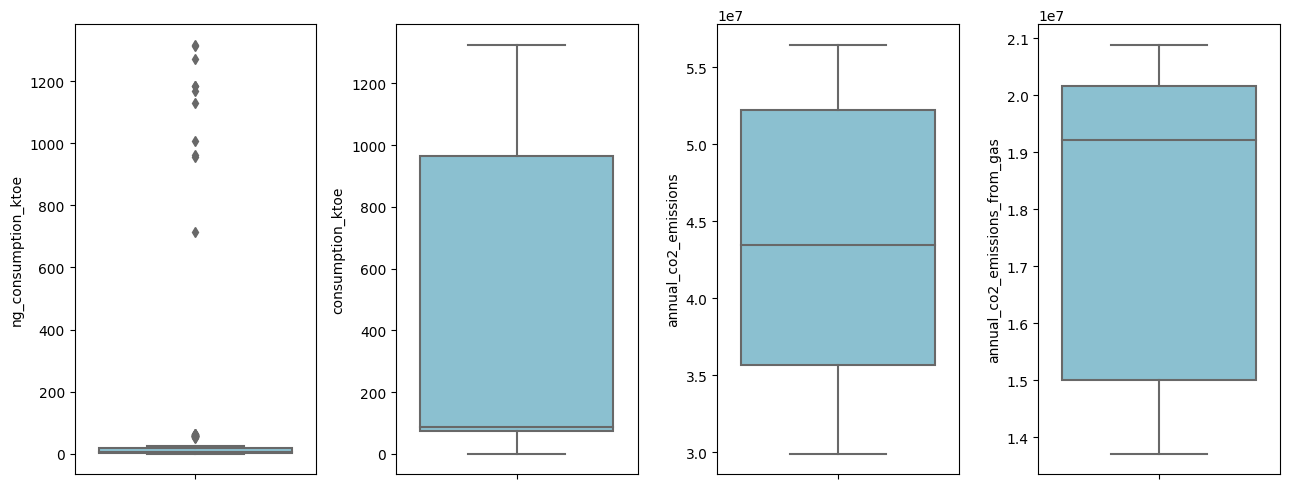

In [26]:
# Check for outliers 
fig, axMany = plt.subplots(1,4, figsize=(13,5))
colCnt = 0;
cols = finalDF.drop(columns=['year', 'sector','sub_sector'])

for item in cols.columns :
    sns.boxplot(y=cols[item] ,color='#7FC7DB', ax=axMany[colCnt])
    colCnt = colCnt + 1

plt.tight_layout()
plt.show()

There are 33 outliers in the ng_consumption_ktoe column</br>

However, the outliers are caused by zero values in certain sectors, so we will not change them.</br>

In [27]:
# Export final dataset to csv
finalDF.to_csv("./Output/final.csv", index=False)

<h1>Visualisation</h1>

The main goal of this data analysis is to find out what the trend of carbon dioxide emissions due to natural gas consumption in Singapore is.</br>

We are also going to investigate was are the main contributors to the carbon dioxide emissions.</br>

<h6>[1] ktoe- kilotonne of oil equivalent</h6>



<h2>Graph 1</h2>

This graph is going to be a line chart of CO₂ emissions in Singapore and also the co2 emissions in Singapore due to natural gas consumption.</br>

In [28]:
# Plotting the graph
fig = px.line(finalDF, x = "year", y = ["annual_co2_emissions", "annual_co2_emissions_from_gas"],
              title=format_title("Singapore's CO₂ Emissions", "Data from 2009-2019"),
              markers=True, color_discrete_sequence=["#F48B94", "#355CD7"],
              labels={"value": "CO2 Emissions (Tonnes)", "variable": "Emissions", "year": "Year"},
              width=1000, height=550)

# Updating labels and legend
fig.update_layout(xaxis_title="Year", yaxis_title="CO₂ Emissions (Tonnes)",
                  title_x = 0.1,
                  xaxis_range=[2008,2020],
                  yaxis_range=[5000000,60000000],
                  legend_title_text="",
                  font_size=15,
                  font_family="Century Gothic",
                  legend=dict(
                    orientation="h",
                    yanchor="bottom",
                    y=1,
                    xanchor="left",
                    x=0.47
                ))

newnames = {"annual_co2_emissions": "Total CO₂ Emissions","annual_co2_emissions_from_gas": "CO₂ Emissions from Natural Gas"}
fig.for_each_trace(lambda x: x.update(name = newnames[x.name],
                                      hovertemplate = x.hovertemplate.replace(x.name, newnames[x.name])
                                     ))

# Displaying the graph
fig.show()

From the graph, we can see that Singapore's CO₂ emissions have been fluctuating around 30-55 million tons annually from 2009-2019, with the year with the most CO₂ emissions being 2015 at around 56.5 million tones, and the year with the least being 2019 at around 30 million tons.</br>

However, we can also see that the CO₂ emissions produced by natural gas consumption in Singapore have been steadily trending upwards regardless of whether total CO₂ emissions in Singapore increase or decrease since 2009 up to 2019.</br>

Hence, we can see that the proportion of CO₂ emissions in Singapore produced by natural gas consumption is increasing.</br>

<h2>Graph 2</h2>

This graph is going to be a line chart of how the CO₂ emissions due to natural gas consumption is projected to be.</br>

To do this, we use statsmodel to fit a linear regression model to the data. We experiment with different models to see which Rsquared value is the highest to see which model is the best.</br>

In [29]:
# OLS
modelOLS = sm.OLS.from_formula(formula='annual_co2_emissions_from_gas ~ year', data=finalDF).fit()

# Verify model
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     annual_co2_emissions_from_gas   R-squared:                       0.921
Model:                                       OLS   Adj. R-squared:                  0.920
Method:                            Least Squares   F-statistic:                     1772.
Date:                           Sat, 04 Feb 2023   Prob (F-statistic):           1.11e-85
Time:                                   01:45:19   Log-Likelihood:                -2290.9
No. Observations:                            154   AIC:                             4586.
Df Residuals:                                152   BIC:                             4592.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.502e+09   3.61e+07    -41.596      0.000   -1.57e+09   -1.43e+09
year        7.546e+05   1.79e+04     42.097      0.000    7.19e+05     7.9e+05
==============================================================================
Omnibus:                       88.964   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.129
Skew:                           0.398   Prob(JB):                     0.000855
Kurtosis:                       1.747   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# GLS
modelGLS = sm.GLS.from_formula(formula='annual_co2_emissions_from_gas ~ year', data=finalDF).fit()

# Verify model
modelGLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     annual_co2_emissions_from_gas   R-squared:                       0.921
Model:                                       GLS   Adj. R-squared:                  0.920
Method:                            Least Squares   F-statistic:                     1772.
Date:                           Sat, 04 Feb 2023   Prob (F-statistic):           1.11e-85
Time:                                   01:45:19   Log-Likelihood:                -2290.9
No. Observations:                            154   AIC:                             4586.
Df Residuals:                                152   BIC:                             4592.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.502e+09   3.61e+07    -41.596      0.000   -1.57e+09   -1.43e+09
year        7.546e+05   1.79e+04     42.097      0.000    7.19e+05     7.9e+05
==============================================================================
Omnibus:                       88.964   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.129
Skew:                           0.398   Prob(JB):                     0.000855
Kurtosis:                       1.747   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# WLS
modelWLS = sm.WLS.from_formula(formula='annual_co2_emissions_from_gas ~ year', data=finalDF).fit()

# Verify model
modelWLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  WLS Regression Results                                 
=========================================================================================
Dep. Variable:     annual_co2_emissions_from_gas   R-squared:                       0.921
Model:                                       WLS   Adj. R-squared:                  0.920
Method:                            Least Squares   F-statistic:                     1772.
Date:                           Sat, 04 Feb 2023   Prob (F-statistic):           1.11e-85
Time:                                   01:45:19   Log-Likelihood:                -2290.9
No. Observations:                            154   AIC:                             4586.
Df Residuals:                                152   BIC:                             4592.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.502e+09   3.61e+07    -41.596      0.000   -1.57e+09   -1.43e+09
year        7.546e+05   1.79e+04     42.097      0.000    7.19e+05     7.9e+05
==============================================================================
Omnibus:                       88.964   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.129
Skew:                           0.398   Prob(JB):                     0.000855
Kurtosis:                       1.747   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All 3 models returned the same Rsquared value, so we can use any of the 3 models.</br>

This is because the data is not very complex and we only have 10 rows of data. Hence, we can proceed with any of the 3 models. For this prediction, we will use OLS model.</br>

In [32]:
# Use the model to predict values until 2030
yNew = modelOLS.predict(pd.DataFrame({'year': range(2020, 2031)}))
predict = modelOLS.predict(finalDF['year'])

# Verify predictions
yNew.head()

0    2.258351e+07
1    2.333813e+07
2    2.409275e+07
3    2.484737e+07
4    2.560199e+07
dtype: float64

Next, we plot out the model and the data.</br>

In [33]:
# Plotting the data
fig = px.scatter(finalDF, x = "year", y = ["annual_co2_emissions_from_gas"],
                 title=format_title("Singapore's CO₂ Emissions from Natural Gas", "Predicted values until 2030"),
                 color_discrete_sequence=["#355CD7"],
                 labels={"value": "CO2 Emissions (Tonnes)", "variable": "Emissions", "year": "Year"},
                 width=1000, height=550)


# Updating labels and legend
fig.update_layout(xaxis_title="Year", yaxis_title="CO₂ Emissions (Tonnes)",
                  title_x=0.1,
                  xaxis_range=[2007,2030],
                  yaxis_range=[12500000,32500000],
                  legend_title_text="",
                  font_family="Century Gothic",
                  font_size=15,
                  legend=dict(
                    orientation="h",
                    yanchor="bottom",
                    y=1,
                    xanchor="left",
                    x=0.65
                ))

newnames = {"annual_co2_emissions_from_gas": "CO₂ Emissions from Natural Gas"}
fig.for_each_trace(lambda x: x.update(name = newnames[x.name],
                                      hovertemplate = x.hovertemplate.replace(x.name, newnames[x.name])
                                    ))

# Plotting the model 
fig.add_trace(go.Scatter(x=np.arange(2008,2030), y=np.hstack((np.unique(predict),yNew)), mode='lines', name='Model'))

# Annotations
fig.add_annotation(x=2026.7, y=24500000,
            text="Correlation between<br>year and CO₂ emissions<br>from natural gas: 0.92",
            showarrow=False,
            yshift=10,
            bgcolor="#E8E7E9",
            bordercolor="#5A5A5A",)

# Show figure
fig.show()

From the graph, we are able to see that CO₂ emissions due to natural gas consumption is projected to increase by 0.85 Million tons annually.</br>

It is also projected that before 2030, CO₂ emissions due to natural gas consumption will hit 30 million tons in a year.</br>

That is about a 50% increase in CO₂ emissions from 2019, indicating increased natural gas consumption.

The model also shows a very strong correlation between year and the CO₂ emissions due to natural gas consumption, with a correlation coefficient of 0.92.</br>

<h2>Graph 3</h2>

We want to investigate what is causing the increase in natural gas consumption, so we will plot a pie chart of the natural gas consumption in Singapore by sector.</br>

In [34]:
# Subsetting the data
sectorConsumption = finalDF.groupby("sector")["consumption_ktoe"].sum().reset_index()

# Correcting values
sectorConsumption.loc[sectorConsumption["sector"] == "Commerce and Services-related", "consumption_ktoe"] = sectorConsumption.loc[sectorConsumption["sector"] == "Commerce and Services-related", "consumption_ktoe"] / 7
sectorConsumption.loc[sectorConsumption["sector"] == "Industry-related", "consumption_ktoe"] = sectorConsumption.loc[sectorConsumption["sector"] == "Industry-related", "consumption_ktoe"] / 4

# Verify data
sectorConsumption

sector  consumption_ktoe
0  Commerce and Services-related             934.9
1                     Households             646.4
2               Industry-related           12319.7
3                         Others              19.2
4              Transport-related             153.8

In [35]:
# Plotting the graph
fig = px.pie(sectorConsumption, values="consumption_ktoe", names="sector",
             title=format_title("Singapore's Natural Gas Consumption by Sector", "Sum of consumption from 2009-2019"),
             labels={"consumption_ktoe": "Consumption (Ktoe)", "sector": "Sector"},
             width=700, height=550)

# Updating labels and legend
fig.update_layout(title_x=0.5, font_family="Century Gothic",
                  font_size=15,
                    margin=dict(
                        l=0,
                        r=200,
                        b=10,
                        t=40),
                    legend=dict(
                        yanchor="top",
                        y=0.7,
                        xanchor="left",
                        x=1
                    ))
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0,0,0.2,0,0])

# Show figure
fig.show()

From the graph, we can see that a large majority (87.5%) of natural gas in Singapore is used in the industrial sector.</br>

The commerce annd service related sector uses significantly less natural gas, at 6.64%, and followed by households using 4.59%.</br>

The transport sector uses 1.09% and other sectors combined only use 0.136%.</br>

Overall, we can see that the largest consumer of natural gas in Singapore is the industrial sector, with non-industry related sectors being responsible for 12.5% of natural consumption. In the industrial sector, natural gas is used as fuel, raw materials or to treat products in manufacturing, and to generate electricity in the utilities subsector based on <link>https://www.ngsa.org/industrial-uses-of-natural-gas/</link>.</br>

<h2>Graph 4</h2>

We now want to see what subsector of the industrial sector is using the most natural gas by plotting a bar chart of mean natural gas consumption by subsector.</br>


In [36]:
# Subsetting the data 
subsectorConsumption = finalDF.loc[finalDF["sector"] == "Industry-related"].groupby("sub_sector")["ng_consumption_ktoe"].mean().reset_index()

# Verify data
subsectorConsumption

sub_sector  ng_consumption_ktoe
0              Construction             5.112822
1             Manufacturing          1109.980067
2  Other Industrial-related             0.013245
3                 Utilities             4.877016

In [37]:
# Plotting the graph
fig = px.bar(subsectorConsumption, x="sub_sector", y="ng_consumption_ktoe",
             log_y=True,
             title=format_title("Singapore's Natural Gas Consumption by Sub-Sector of Industry", "Average annual consumption from 2009-2019"),
             labels={"sub_sector": "Sub-Sector", "ng_consumption_ktoe": "Natural Gas Consumption (ktoe)"},
             width=750, height=500)

fig.update_layout(font_family="Century Gothic",
                  font_size=15,
                  title_x=0.5)
fig.update_traces(marker_color='#A020F0')

# Show figure
fig.show()

For the graph, we use a log scale for visualisation as the natural gas consumption for manufacturing is so large that the other subsectors are not visible on a linear y-axis.</br>

From this, we can see that the manufacturing subsector is using the most natural gas by a very large margin (average of 1102 ktoe each year), followed by the construction and utilities subsectors (both ~5 ktoe each year).</br>

Other industrial-related subsectors use less than 1 ktoe of natural gas total each year.</br>

Overall, we can see that the manufacturing subsector is resonsible for more than 99% of natural gas consumption in the industry-related sectors.</br>

<h2>Graph 5</h2>

Finally, we plot a regression plot of natural gas consumption by the sub-sector manufacturing to find out the trend of the consumption over time.</br>

In [38]:
# Plotting the graph
fig = px.scatter(finalDF.loc[finalDF['sector'] == 'Industry-related'], x="year", y="ng_consumption_ktoe",
                 color="sub_sector",trendline="ols",
                 title=format_title("Singapore's Industrial Sector Natural Gas Consumption ", "by Sub-Sector"),
                 labels={"ng_consumption_ktoe": "Natural Gas Consumption (ktoe)", "year": "Year"},
                 width=1000, height=650)

# Updating labels and legend
fig.update_layout(legend_title_text="Sub-Sector",
                  font_family="Century Gothic",
                  font_size=15,
                  title_x=0.1)

# Show figure
fig.show()

Using the interactivity of the chart, we can see that the contruction subsector has increased natural gas consumption from 2009-2019 from around 3 to 5.5 ktoe.</br>

The Utitlies subsector has actually decreased natural gas consumption, falling from around 8 ktoe in 2009 to about 1.5 ktoe in 2019.</br>

Other industrial-related subsectors have had no natural gas consumption until recent years, where it has hovered at less than 0.1 ktoe</br>

When we include manufacturing in the regression plot, we can see that the other subsectors are overshadowed. We can also see that natural gas consumption in manufacturing has increased significantly, from around 800 ktoe in 2009 to around 1300 ktoe in 2019, which is an increased of about 62%.</br>

The reason for the increase in natural gas consumption in manufacturing is likely due to the increase in the production of chemicals and petrochemicals, which is the largest subsector of manufacturing in Singapore. On the other hand, the decrease in natural gas consumption in utilities subsector can be explained by the NEA introducing mandatory energy management requirements for companies involved in utilities based on <link>https://www.nccs.gov.sg/media/press-release/singapore-to-improve-energy-efficiency-of-the-industry-sector</link>. This can also be seen in the graph as in 2014, the natural gas consumption of utilities subsector decreased to about 33% of that in 2013 and has continued a decreasing trend.</br>



<h1>Conclusions</h1>

After analysing the data, Ronnie managed to write up the following report containing his findings and potential courses of action that NEA can take:</br>

- Singapore's CO₂ emissions have been fluctuating around 30-55 million tons annually from 2009-2019, but natural gas is starting to become a larger contributor to the total CO₂ emissions</br>

- Natural gas consumption in Singapore is projected to increase by 0.85 Million tons annually, and before 2030, annual CO₂ emissions due to natural gas consumption will hit 30 million tons.</br>

- The largest consumer of natural gas in Singapore is the industrial sector, with non-industry related sectors being responsible for 12.5% of natural consumption.</br>

- The manufacturing subsector is resonsible for more than 99% of natural gas consumption in the industry-related sectors.</br>

- Natural gas consumption in manufacturing has increased significantly, from around 800 ktoe in 2009 to around 1300 ktoe in 2019, which is an increased of about 62%.</br> 

<h1>What needs to be done?</h1>

CO₂ emissions are a major contributor to global warming, which is a serious issue that affects every country in the world. Hence, we must do our best to reduce CO₂ emissions. This can be done in Singapore by reducing our consumption of natural gas, as natural gas is a major source of CO₂ emissions in Singapore.

Natural gas is also not a renewable resource, so we must do our best to conserve it. However, natural gas is also a very important resource for Singapore, as it is used in many industries and is a major source of electricity generation. Hence, we must find a balance between conserving natural gas and using it efficiently.</br>

Based on: 
- <link>https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide</link>
- <link>https://www.nccs.gov.sg/singapores-climate-action/power-generation/</link>

<h1>What can be done?</h1>

As things currently stand, the manufacturing subsector is responsible for the majority of natural gas consumption in Singapore, and a large amount of the natural gas consumed is used for industrial process heating systems. To reduce the consumption of natural gas by manufacturers, the Singapore government can consider the following based on <link>https://www.globalefficiencyintel.com/new-blog/2022/3/8/saving-natural-gas-in-a-hurry-in-industry</link>: </br> 

- Policies to mandate improved energy efficiency of production lines and industrial equipment.</br>
-- Policies to mandate improved energy efficiency has proven to work to decrease natural gas consumption as seen in the utilities subsector.</br>

- Encourage the use of renewable energy sources or alternate fuels in manufacturing.</br>

Additionally,  Most of Singapore's electricity is generated from natural gas, hence saving electricity means natural gas is being saved. Although households are not responsible for much of the natural gas consumption in Singapore as can be seen from the graphs, every little bit of natural gas saved counts.Hence, everyone should consider the following based on <link>https://www.nea.gov.sg/our-services/climate-change-energy-efficiency/energy-efficiency/household-sector/energy-saving-tips</link>:</br>

- Turn off lights and appliances when not in use.</br>

- Use energy efficient appliances.</br>

- Refrain from using air conditioning when possible.</br>

- Unplug appliances when not in use for long periods.</br>




